# Simple Linear Regression - Supervised Model

## Import Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)  #şekillerde belli standartlar olması için 
import warnings
warnings.filterwarnings('ignore')

# gerekli kütüphaneleri import ediyoruz

## Read Dataset

In [6]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input

dependent variable   = target  = label     = output

rows = observation, sample

**features** = TV + radio + newspaper

**target** = sales

In [7]:
df.info()  # dataframe hakkında bilgi veriyor. 200 tane observation var, hepsinin float olduğunu ve null olmadıklarını görüyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()   # burada blgilr veriyor. genelde bu tabloda mean ile std sapmaya bakyoruz. Std sapma eğer mean den büyükse, outlier olduğunu düşünebilrz.  

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Create new independent variable (feature)

In [9]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]  # burada işlemi daha rahat görebilmek için bir feature engineering yapıyoruz. yeni bir feature yaratıyoruz. total spend.

In [10]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [11]:
df = df.iloc[:,[0,1,2,4,3]] # df i düzenledim. hedef sütunu sona almak için 
df.head()

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


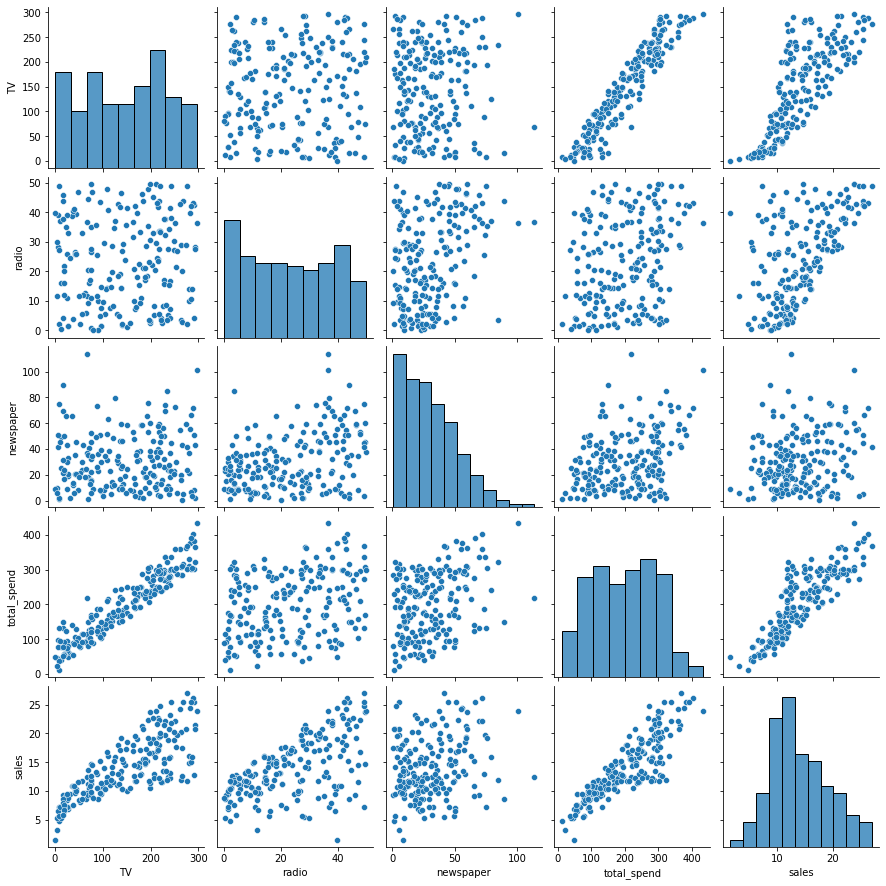

In [12]:
sns.pairplot(df)  # pairplot ile dataya genel bir bakış. en alt satıra bakmak daha mantıklı oluyor. hedef ile ilişkileri gösterdiği için.

## Which feature is more suitable for linear regression?

In [13]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")  # lineer regression için hangi sütunumuz daha uygun? Buna korelasyondan bakıyoruz. 
                                                                       # korelasyonu sayısal olarak görelim. burada en yüksek korelasyon total spend ile görünüyor.

corr between sales and TV          :  0.7822244248616061
corr between sales and radio       :  0.5762225745710551
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017427


<AxesSubplot:>

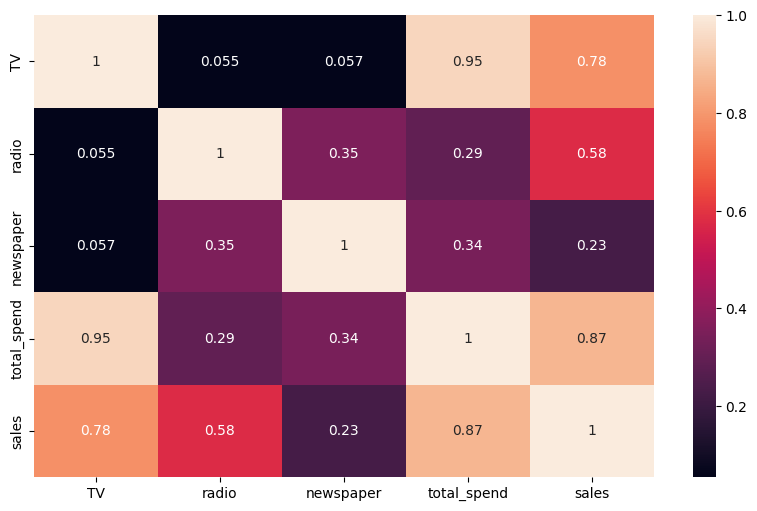

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
df = df[["total_spend", "sales"]]   #independent variable total_spend oluyor, dependent variable sales oluyor.
df

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


## Plotting the relationship between independent variable and dependent variable 

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

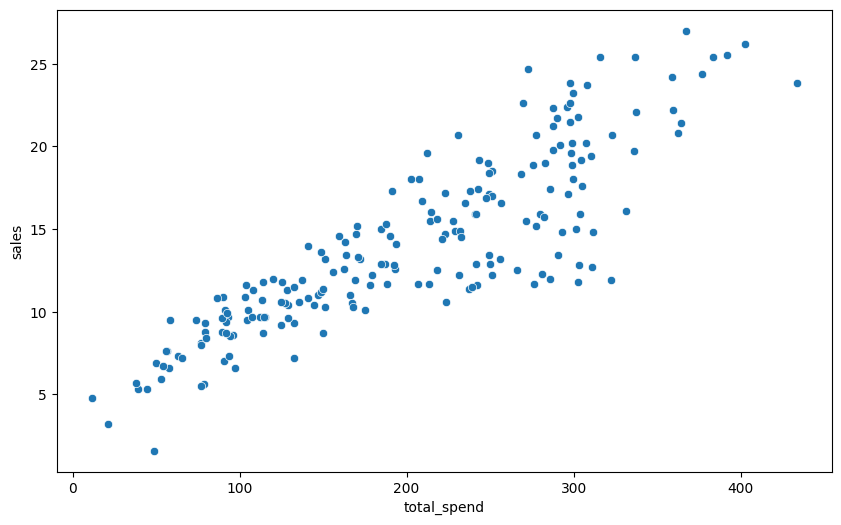

In [16]:
sns.scatterplot(x ="total_spend", y = "sales", data=df) # Plotting the relationship between independent variable and dependent variable. Güçlü bir ilişki görünüyor.

## Correlation between independent variable and dependent variable

In [17]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017427

In [18]:
df["total_spend"].corr(df["sales"])   # korelasyon için yerlerini değiştirsek de farketmiyor.

0.8677123027017427

## Coefficient of determination (R^2)

In [19]:
R2_score = corr**2     # R2 (R square) benim independent variable larım (x lerim) dependent variable ımı y'mi ne ölçüde açıklayabiliyor.
R2_score               # simple lineer regresyonda, korelasynun karesi alınına R2 bulunuyor. multiple da böyle bir şey yok.
                       # sonuç %75 bulundu. bu ne dmek? satışlarımı, total harcalarım %75 oranında açıklayabiliyor. %25 daha farklı etkenler var.

0.7529246402599608

A house price ----> 50.000 USD

B house price ----> 60.000 USD


A house ----> 2+1

B house ----> 3+1


If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

In [20]:
# yukrıdaki örnekte ev fiyatlarındaki farklılığın neden olduğunu inceliyoruz. B evi A evinden 10.000 dolar fazla. oda sayısına göre ev fiyatları 3.000 dolar fark ediyor, bunu biliyoruz.
# bu durumda, 3bini, 10bine orantıladığımızda. r2 skoru 0.3 oluyor. o zaman diyorum ki modelim yüzde 30 oranında başarılı. ancak %30luk kısmı oda sayısı ile açıklayabiliyorum.

## Linear Regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

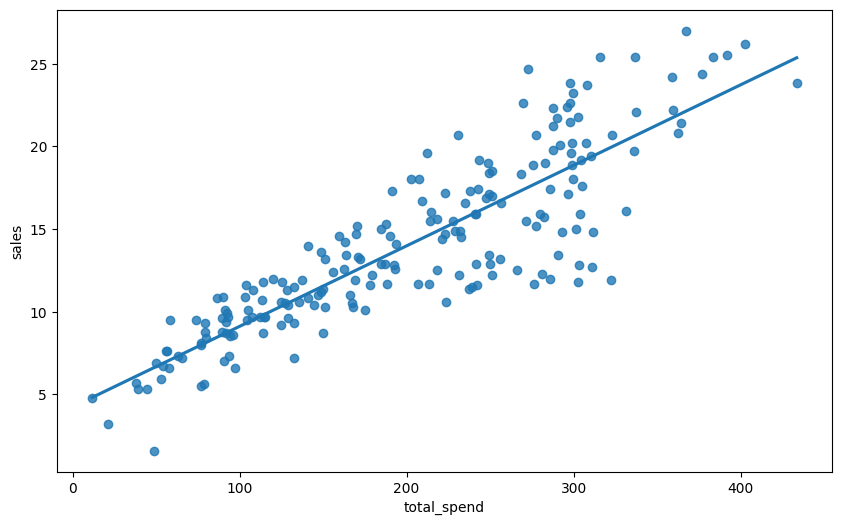

In [21]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)   # seaborn un regplotu var, doğrudan regresyon doğrusunu çiziyor. best line bu doğru. least square metodu ile.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [17]:
# y_pred = b1X + b0

In [22]:
X= df["total_spend"]        # burada datamızı ikiye ayırıyoruz. X ve y. X'lerimiz featurelarımız, y ise hedef sütunu.  
y= df["sales"]           

## Determination of coefficients (slope and intercept)

In [23]:
np.polyfit(X, y, deg=1)       # numpy'ın pratik bir fonksiyonu var(polyfit). x ve y yi verdiğimde katsayıları hesaplıyor. 

array([0.04868788, 4.24302822])

In [24]:
slope, intercept = np.polyfit(X, y, deg=1)    # bu şekilde yazdığımızda, ilk katsayı slope, ikincisi intercept oluyor. birinci dereceden, y = ax + b.

In [25]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.048687879319048145
intercept: 4.243028216036325


In [ ]:
# buraya kadar anlatılmak istenen aslında lineer regresyonun bir fonksiyon olduğu. ax+b bu bir simple lineer regresyon modelidir.

## Why do we use the least squares error method to find the regression line that best fits the data?

In [26]:
b1, b0 = np.polyfit(X, y, deg=1)

In [27]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.243028216036325


In [28]:
y_pred = b1*X + b0   # tahmin edeceğim değerler: b1 * X + b0

In [29]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2}  
df_2 = pd.DataFrame(values)
df_2
# burada actual değerleri y, sales sütunundakiler. y_pred tahmin edeceklerim, üst satırdaki formüle uygun olarak.
# residual lar hatam oluyor. yani actuallar ile gerçek değerlerim ile, pred ile tahmin ettiğim değerler ile arasındaki fark bana residual ları veriyor, hatayı veriyor, erroru veriyor.
# LSE (least square error) da, gerçek değer ile tahmin ettiğimiz değerin farklarının karelerini alıyoruz. bunu bütün data noktalarımız için yapıyoruz. residual ların kareleri.
# tüm data noktaları için LSE'leri hesaplayıp bunu minimize etmeye çalışıyoruz, olay bu.

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [30]:
df_2.residual.sum().round()  # residual ların toplamı (hataların toplamı) 0 (sıfır) olur. zaten sıfır olduğundan dolayı kareler yöntemini kullanıyoruz.

0.0

## Prediction with simple linear regression

In [32]:
potential_spend = np.linspace(0, 500, 100)      # yaptığım model ile bir tahmin almak istiyorum. np linspace ile 0-500 arasında bana 100 değer üretsin.
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [33]:
predicted_sales_lin = b1* potential_spend + b0        # şimdi oluşturduğum yapay data ile pred leri hesaplatıyorum.
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

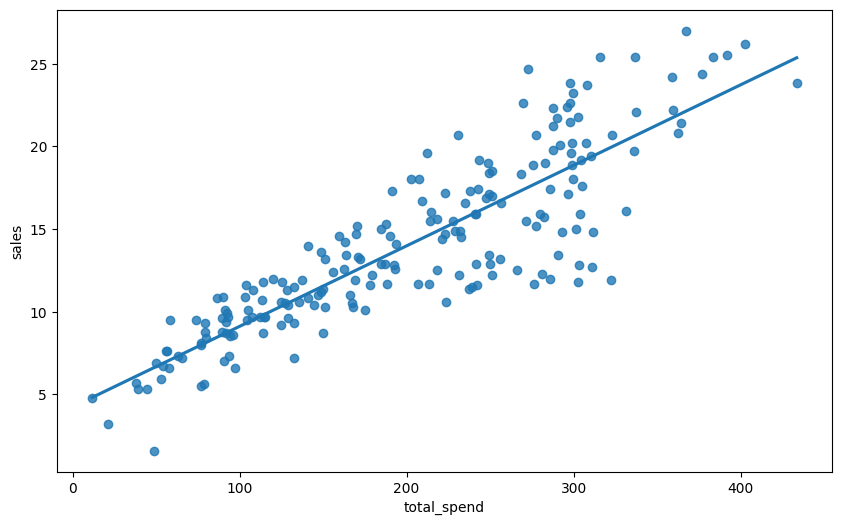

In [34]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)   # burada total spend ile sales in regplot unu çizdiriyorum.

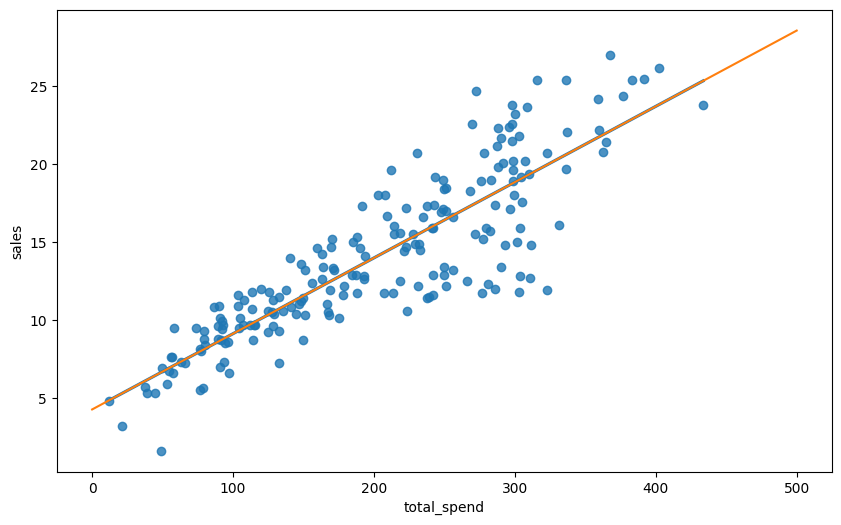

In [35]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)
plt.plot(potential_spend, predicted_sales_lin)                # burada bir üst satırdakine ilave olarak, tahmin ettiğim değerler ile plot luyorum. üstüste oturduğunu görüyorum.

In [ ]:
# bu notebook'ta yaptıklarımızı bundan sonra böyle yapmayacağız. burada kavramlar açıklığa kavuşsun diye bu şekilde yapıldı.
# bundan sonra zaten scikit learn dn gerekli fonksiyonları import edip, oradan direkt datamızı modelimize verip, fit yapıp, daha sonra tahminler alıp bu tahminlere bakacağız.
# sonra R2 imize bakacağız. label ımızı featurelar ne derece açıklıyor, buna bakacağız. güzel bir oran yakalıyorsk, yolumuza devam edeceğiz. deploy edeceğiz modelimizi. 
# ama modelimizin skoru çok iyi değilse bunu güçlendirmeye yönelik atraksiyonlar yapacağız. 

## How can we improve our predictions?

In [ ]:
# simple lineer regresyon ile bir giriş yapmış olduk. bunu görselleştirip anlayabiliyoruz. ancak multipl olduğu zaman görselleştirip anlamak zor.  
# bundan sonra scikit learn kütüphanesi kullanmya başlayacağız. 
# size göstermek istediğimiz şey, aslında herkesin model model dediği şeyin matematiksel bir denklem olduğu. onu da istatistiksel metodlar ile buluyoruz. onun da nasıl bulunduğunu
# burada basit yöntemlerle burada gösterdik.
# np polyfit ile slope ve intercept ini bulabiliyorsunuz. ondan sonra o data ile alakalı bir prediction yapabiliyorsunuz. bunun nasıl yapılabildiğini göstermek için biraz açtık.     
# bu işin temeli bu olduğu için açtık. yoksa bundan sonra lineer regresyon yazacağız, bir tane model yapacağız. içine datayı besleyeceğiz, sonra test edeceğiz. bizim işimiz bu kadar. 
# slope ve intercept ile ihtiyacımız olduğu kadar ilgileneceğiz.

In [ ]:
# model sizin eğittiğiniz data range inde prediction lar yapar.range önemli.diğer datalarda hata verir.hangi sample da çalıştı iseniz, ona ilişkin popülasyonun tahminlerini yapabilirsiniz.